<a href="https://colab.research.google.com/github/vmoutteau/DataSet-L34-F/blob/main/Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/vmoutteau/DataSet-L34-F.git
path = "./DataSet-L34-F/"

Cloning into 'DataSet-L34-F'...
remote: Enumerating objects: 3344, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3344 (delta 0), reused 3 (delta 0), pack-reused 3341
Receiving objects: 100% (3344/3344), 211.24 MiB | 13.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (3366/3366), done.


In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=256):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 3))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index][idx_class] = 1
                current_index += 1

    return x, y

In [ ]:
# Déclaration et initialisation de variables et constantes
labels = ['py', 'ml', 'java']
path = "./DataSet-L34-F/"
IMG_SIZE = 216

In [ ]:
x_train, y_train = load_data(path, labels, dataset='train', image_size = IMG_SIZE)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='val', image_size = IMG_SIZE)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size = IMG_SIZE)
print(x_test.shape, y_test.shape)

from random import Random

Random(1).shuffle(x_train)
Random(1).shuffle(y_train)

x_train = x_train[0:1500]
y_train = y_train[0:1500]

(2357, 216, 216, 3) (2357, 3)
(335, 216, 216, 3) (335, 3)
(673, 216, 216, 3) (673, 3)


TypeError: only length-1 arrays can be converted to Python scalars

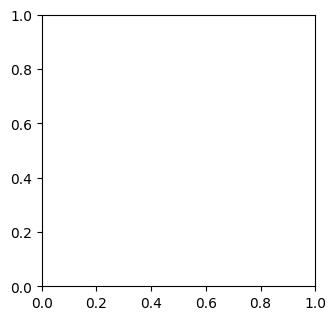

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(1000)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten


model = Sequential()

model.add(Conv2D(32, (3, 3), activation = "relu", input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) # Diviser la dimension des tenseurs par 2

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense
model.add(Dense(1024, activation="relu"))   # Couche dense, à 512 neurones
model.add(Dense(512, activation="relu"))
model.add(Dense(3, activation='softmax'))

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=50)

Epoch 1/15
30/30 [==============================] - 6s 113ms/step - loss: 4.8183 - accuracy: 0.7720 - val_loss: 3.5865 - val_accuracy: 0.3522
Epoch 2/15
30/30 [==============================] - 3s 85ms/step - loss: 0.2740 - accuracy: 0.8900 - val_loss: 4.7952 - val_accuracy: 0.4597
Epoch 3/15
30/30 [==============================] - 2s 82ms/step - loss: 0.1461 - accuracy: 0.9460 - val_loss: 8.1953 - val_accuracy: 0.5254
Epoch 4/15
30/30 [==============================] - 3s 86ms/step - loss: 0.0784 - accuracy: 0.9733 - val_loss: 8.2432 - val_accuracy: 0.5940
Epoch 5/15
30/30 [==============================] - 3s 86ms/step - loss: 0.0841 - accuracy: 0.9793 - val_loss: 7.6097 - val_accuracy: 0.4985
Epoch 6/15
30/30 [==============================] - 2s 82ms/step - loss: 0.0942 - accuracy: 0.9693 - val_loss: 13.3161 - val_accuracy: 0.3672
Epoch 7/15
30/30 [==============================] - 2s 83ms/step - loss: 0.1748 - accuracy: 0.9520 - val_loss: 10.0880 - val_accuracy: 0.4179
Epoch 8/15

In [ ]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

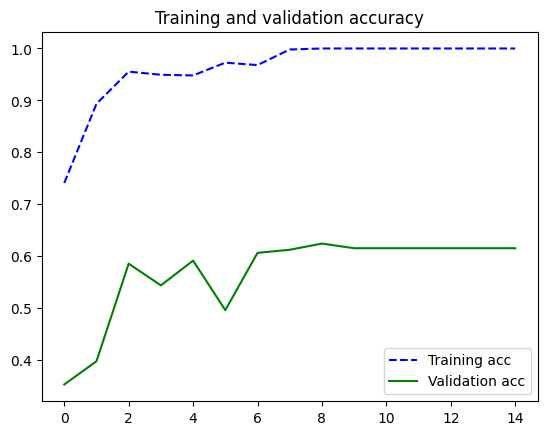

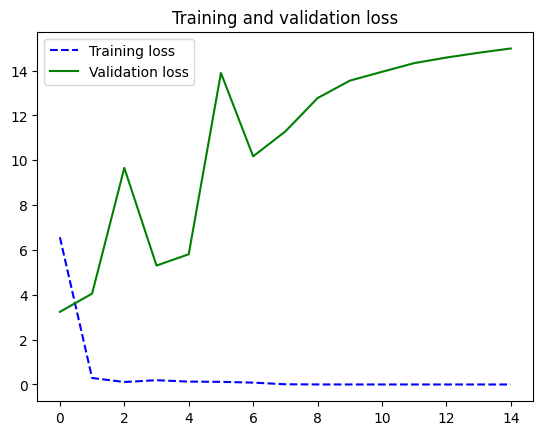

In [ ]:
plot_training_analysis()